In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import numpy as np
import healpy as hp

In [4]:
# download raw data

planck30 = hp.read_map('../data_files/LFI_SkyMap_030_1024_R2.01_full.fits')
planck44 = hp.read_map('../data_files/LFI_SkyMap_044_1024_R2.01_full.fits')
planck70 = hp.read_map('../data_files/LFI_SkyMap_070_1024_R2.01_full.fits')
planck100 = hp.read_map('../data_files/HFI_SkyMap_100_2048_R2.02_full.fits')
planck143 = hp.read_map('../data_files/HFI_SkyMap_143_2048_R2.02_full.fits')
planck217 = hp.read_map('../data_files/HFI_SkyMap_217_2048_R2.02_full.fits')
planck353 = hp.read_map('../data_files/HFI_SkyMap_353_2048_R2.02_full.fits')

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/andrewlewis/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:372: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  warnings.warn("No INDXSCHM keyword in header file : " "assume {}".format(schm))


Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


In [5]:
# lower the resolution of the maps

planck30 = hp.ud_grade(planck30, 512)
planck44 = hp.ud_grade(planck44, 512)
planck70 = hp.ud_grade(planck70, 512)
planck100 = hp.ud_grade(planck100, 512)
planck143 = hp.ud_grade(planck143, 512)
planck217 = hp.ud_grade(planck217, 512)
planck353 = hp.ud_grade(planck353, 512)

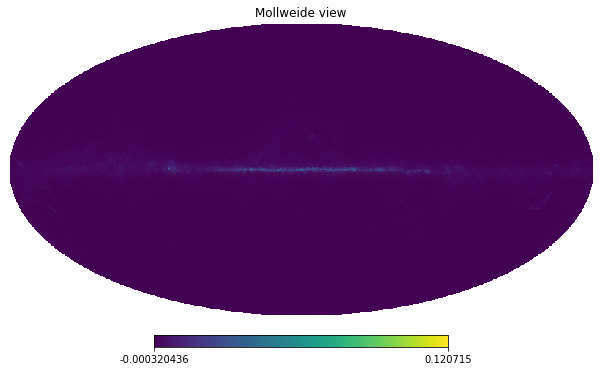

In [6]:
# example plot of raw data

hp.mollview(planck217,nest=False)

In [7]:
# implement the Lagrange method

map_array = np.array([planck30, planck44, planck70, planck100, planck143, planck217, planck353])

# define weighted map sum function

def map_sum(w):
    """Given an array of weights w,returns a weighted sum of the maps"""
    return w@map_array

In [8]:
def get_H(map_array):
    i = 0
    j = 0
    H = np.zeros((len(map_array), len(map_array)))
    
    for m in map_array:
        
        j = 0
        for n in map_array:
            product = m*n
            product_sum = np.sum(product)
            H[i, j] = product_sum
            j+=1
        i+=1
    return H

In [9]:
H = get_H(map_array)



In [10]:
e = np.ones(len(map_array))

In [11]:
w = (np.linalg.inv(H)@e) / (e.T@H@e)

In [12]:
print(w)
print(np.sum(w))
print(w/np.sum(w))
opt_map = map_sum(w/np.sum(w))
print(opt_map)

[-0.00288621  0.0104061  -0.0195659   0.01101462  0.02525271 -0.00272827
 -0.00060967]
0.02088339220663807
[-0.13820596  0.4982956  -0.93691211  0.52743458  1.20922469 -0.13064282
 -0.02919399]
[-1.65588589e-04 -7.40888188e-05 -1.31758658e-05 ...  9.81450736e-05
  1.01674421e-04  9.97091627e-05]


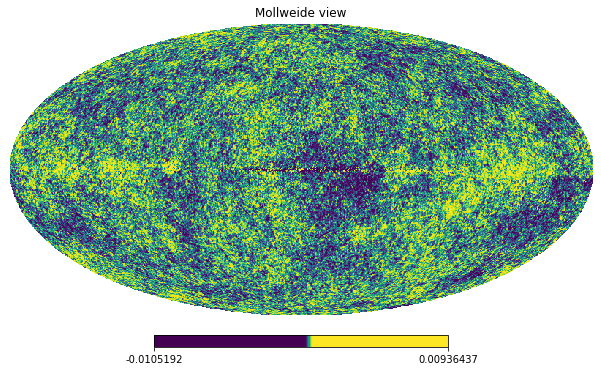

In [13]:
hp.mollview(opt_map, nest=False, norm='hist')

Andrew's Part 

=========================================================================================================================

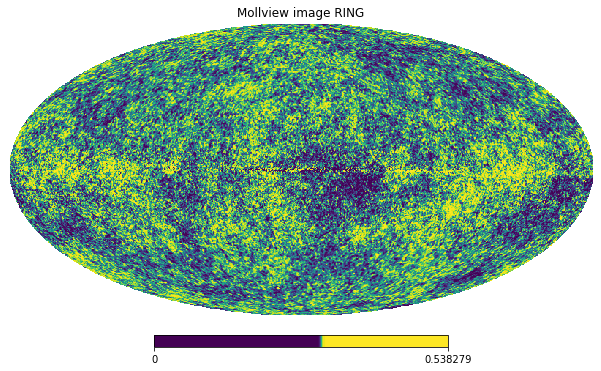

In [43]:
#Importing the relevant modules for my part
import PartitionCode as pc

slicedMap = (pc.sliceCMBFixer(12,map_array))
slicedMap = slicedMap + abs(min(slicedMap))
slicedMap = slicedMap * 1/max(slicedMap)

hp.mollview(slicedMap, title="Mollview image RING",norm = 'hist')

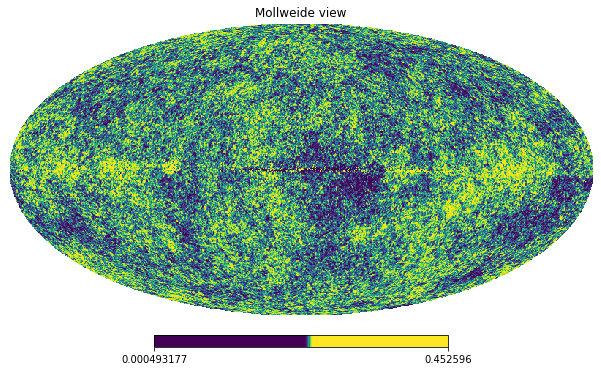

In [44]:
opt_map = opt_map + abs(min(opt_map))
opt_map = opt_map * 1/max(opt_map)
hp.mollview(opt_map, nest=False, norm='hist')

In [45]:
#This is the part where I try to spherical harmonic

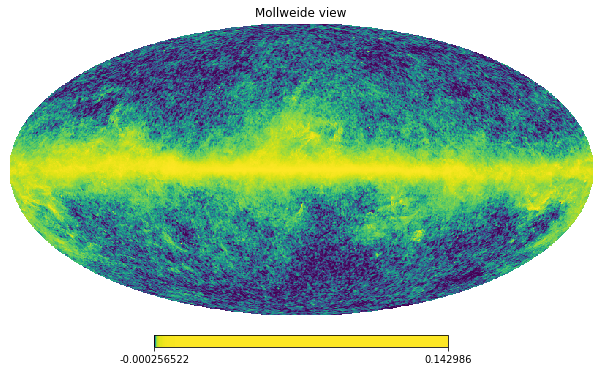

In [46]:
#What happens if I just weight every map equally
equalMap = planck30*(1/7) + planck44*(1/7) + planck70*(1/7) + planck100*(1/7) +  planck143*(1/7) +  planck217*(1/7) +  planck353*(1/7)

hp.mollview(equalMap, nest=False, norm='hist')


In [47]:
#Plotting of Power Spectra

In [48]:
LMAX = 1024
cl1 = hp.anafast(opt_map, lmax = LMAX)

In [49]:
#Equal Map
equalMap = equalMap + abs(min(equalMap))
equalMap = equalMap * 1/max(equalMap)

In [50]:
#USing hp.anafast to make the power spectrum
LMAX = 1024
cl2 = hp.anafast(slicedMap, lmax = LMAX)
cl3 = hp.anafast(equalMap,lmax = LMAX)

In [51]:
#Creating the x axis
ell1 = np.arange(len(cl1)) 
ell2 = np.arange(len(cl2)) 
ell3 = np.arange(len(cl3))


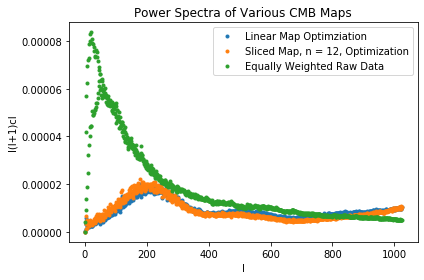

In [52]:
#Plotting all three power spectra
plt.figure()
plt.plot((ell1), ell1 * (ell1+1) * cl1,'.', label = 'Linear Map Optimziation')
plt.plot((ell2), (ell2 * (ell2+1) *cl2),'.', label = 'Sliced Map, n = 12, Optimization')
plt.plot(ell3, (ell3 * (ell3+1) *cl3),'.', label = 'Equally Weighted Raw Data')

plt.xlabel('l'); plt.ylabel('l(l+1)cl');
plt.legend()
plt.title('Power Spectra of Various CMB Maps')
plt.tight_layout()
plt.savefig('PowerSpectrums.PNG')

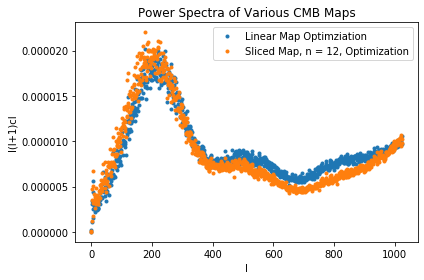

In [53]:
# Now only two power spectra
plt.figure()
plt.plot((ell1), ell1 * (ell1+1) * cl1,'.', label = 'Linear Map Optimziation')
plt.plot((ell2), (ell2 * (ell2+1) *cl2),'.', label = 'Sliced Map, n = 12, Optimization')
plt.xlabel('l'); plt.ylabel('l(l+1)cl');
plt.legend()
plt.title('Power Spectra of Various CMB Maps')
plt.tight_layout()
plt.savefig('PowerSpectrums2.PNG')

===========================================================================================================================

In [24]:
#Louis' part starts here

In [25]:
sph_map_array = []
#create an array of the maps in spherical harmonic spaces
for i in map_array: 
    sph_map_array.append(hp.sphtfunc.map2alm(i, lmax = 1024))

In [26]:
def wLCalc(cL, e):
    return (np.linalg.inv(cL)@e) / (e.T@np.linalg.inv(cL)@e)

In [30]:
#initialize cl matrix list
cLArray = np.zeros((7,7,1025))
cLArray = cLArray*1e4

In [31]:
countI = 0
countJ = 0
#fill out the cl matrix list for each cross-power spectrum using equation 13
for i in map_array:
    countJ = 0
    for j in map_array:
        element = hp.sphtfunc.anafast(i, map2 = j, lmax = 1024)
        cLArray[countI, countJ] = element
        countJ += 1
    countI += 1

In [32]:
#initialize weights list
wLArray = np.zeros((7,1025))

In [33]:
#fill out weights list using equation 12
countI = 0
while countI < 1025:
    wLArray[:,countI] = wLCalc(cLArray[:,:,countI], e)
    countI += 1
print(wLArray)
wLArray.shape

LinAlgError: Singular matrix

In [34]:
almArray = []

In [35]:
#calculate the new alm's using equation 10
lCounter = 0
while lCounter < 1025:
    mCounter = 0
    mMax = lCounter+1
    print("We are at l = ", lCounter)
    while mCounter < mMax:
        almList = np.asarray([sph_map_array[0][mCounter], sph_map_array[1][mCounter], sph_map_array[2][mCounter], sph_map_array[3][mCounter], sph_map_array[4][mCounter], sph_map_array[5][mCounter], sph_map_array[6][mCounter]])
        newAlm = almList.T@wLArray[:,lCounter]
        almArray.append(newAlm)
        mCounter += 1
    lCounter += 1

We are at l =  0
We are at l =  1
We are at l =  2
We are at l =  3
We are at l =  4
We are at l =  5
We are at l =  6
We are at l =  7
We are at l =  8
We are at l =  9
We are at l =  10
We are at l =  11
We are at l =  12
We are at l =  13
We are at l =  14
We are at l =  15
We are at l =  16
We are at l =  17
We are at l =  18
We are at l =  19
We are at l =  20
We are at l =  21
We are at l =  22
We are at l =  23
We are at l =  24
We are at l =  25
We are at l =  26
We are at l =  27
We are at l =  28
We are at l =  29
We are at l =  30
We are at l =  31
We are at l =  32
We are at l =  33
We are at l =  34
We are at l =  35
We are at l =  36
We are at l =  37
We are at l =  38
We are at l =  39
We are at l =  40
We are at l =  41
We are at l =  42
We are at l =  43
We are at l =  44
We are at l =  45
We are at l =  46
We are at l =  47
We are at l =  48
We are at l =  49
We are at l =  50
We are at l =  51
We are at l =  52
We are at l =  53
We are at l =  54
We are at l =  55
We

We are at l =  449
We are at l =  450
We are at l =  451
We are at l =  452
We are at l =  453
We are at l =  454
We are at l =  455
We are at l =  456
We are at l =  457
We are at l =  458
We are at l =  459
We are at l =  460
We are at l =  461
We are at l =  462
We are at l =  463
We are at l =  464
We are at l =  465
We are at l =  466
We are at l =  467
We are at l =  468
We are at l =  469
We are at l =  470
We are at l =  471
We are at l =  472
We are at l =  473
We are at l =  474
We are at l =  475
We are at l =  476
We are at l =  477
We are at l =  478
We are at l =  479
We are at l =  480
We are at l =  481
We are at l =  482
We are at l =  483
We are at l =  484
We are at l =  485
We are at l =  486
We are at l =  487
We are at l =  488
We are at l =  489
We are at l =  490
We are at l =  491
We are at l =  492
We are at l =  493
We are at l =  494
We are at l =  495
We are at l =  496
We are at l =  497
We are at l =  498
We are at l =  499
We are at l =  500
We are at l 

We are at l =  886
We are at l =  887
We are at l =  888
We are at l =  889
We are at l =  890
We are at l =  891
We are at l =  892
We are at l =  893
We are at l =  894
We are at l =  895
We are at l =  896
We are at l =  897
We are at l =  898
We are at l =  899
We are at l =  900
We are at l =  901
We are at l =  902
We are at l =  903
We are at l =  904
We are at l =  905
We are at l =  906
We are at l =  907
We are at l =  908
We are at l =  909
We are at l =  910
We are at l =  911
We are at l =  912
We are at l =  913
We are at l =  914
We are at l =  915
We are at l =  916
We are at l =  917
We are at l =  918
We are at l =  919
We are at l =  920
We are at l =  921
We are at l =  922
We are at l =  923
We are at l =  924
We are at l =  925
We are at l =  926
We are at l =  927
We are at l =  928
We are at l =  929
We are at l =  930
We are at l =  931
We are at l =  932
We are at l =  933
We are at l =  934
We are at l =  935
We are at l =  936
We are at l =  937
We are at l 

In [36]:
npALM = np.asarray(almArray)

In [37]:
new_sph_map = hp.sphtfunc.alm2map(npALM, nside = 1024,lmax = 1024)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


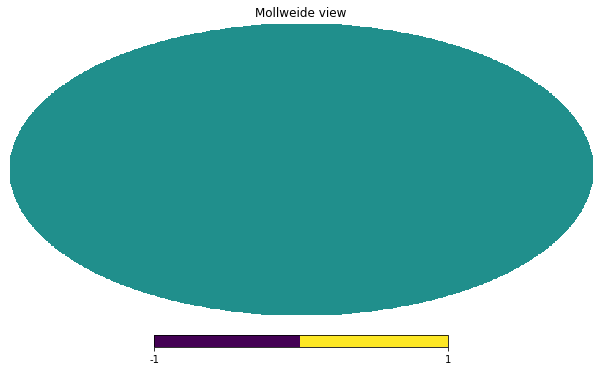

In [38]:
hp.mollview(new_sph_map, nest=False, norm='hist')